In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pydotplus
adult=pd.read_csv('C://Users//user//Desktop//資料探勘作業一//adult.csv',sep='\t')


adult.head()


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,output
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
from sklearn.preprocessing  import LabelEncoder

le=LabelEncoder()

adult['workclass']=le.fit_transform(adult['workclass'])
adult['education']=le.fit_transform(adult['education'])
adult['marital-status']=le.fit_transform(adult['marital-status'])
adult['occupation']=le.fit_transform(adult['occupation'])
adult['relationship']=le.fit_transform(adult['relationship'])
adult['race']=le.fit_transform(adult['race'])
adult['sex']=le.fit_transform(adult['sex'])
adult['native-country']=le.fit_transform(adult['native-country'])
adult['output'] = le.fit_transform(adult['output'])
adult






,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,output
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,0
32557,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,1
32558,58,4,151910,11,9,6,1,4,4,0,0,0,40,39,0
32559,22,4,201490,11,9,4,1,3,4,1,0,0,20,39,0


In [5]:
print(adult['output'].unique())
print(adult['workclass'].unique())
print(adult['education'].unique())
print(adult['marital-status'].unique())
print(adult['occupation'].unique())
print(adult['relationship'].unique())
print(adult['race'].unique())
print(adult['sex'].unique())
print(adult['native-country'].unique())


[0 1]
[7 6 4 1 2 0 5 8 3]
[ 9 11  1 12  6 15  7  8  5 10 14  4  0  3 13  2]
[4 2 0 3 5 1 6]
[ 1  4  6 10  8 12  3 14  5  7 13  0 11  2  9]
[1 0 5 3 4 2]
[4 2 1 0 3]
[1 0]
[39  5 23 19  0 26 35 33 16  9  2 11 20 30 22 31  4  1 37  7 25 36 14 32
  6  8 10 13  3 24 41 29 28 34 38 12 27 40 17 21 18 15]


In [6]:
adult.dtypes


age               int64
workclass         int32
fnlwgt            int64
education         int32
education-num     int64
marital-status    int32
occupation        int32
relationship      int32
race              int32
sex               int32
capital-gain      int64
capital-loss      int64
hours-per-week    int64
native-country    int32
output            int32
dtype: object

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(adult.drop('hours-per-week',axis=1))
scaled_features = scaler.transform(adult.drop('hours-per-week',axis=1))
adult_feat = pd.DataFrame(scaled_features,columns=adult.columns[:-1])
adult_feat.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.030671,2.150579,-1.063611,-0.335437,1.134739,0.921634,-1.317809,-0.277805,0.393668,0.703071,0.148453,-0.21666,0.291569,-0.563199
1,0.837109,1.463736,-1.008707,-0.335437,1.134739,-0.406212,-0.608387,-0.900181,0.393668,0.703071,-0.145920,-0.21666,0.291569,-0.563199
2,-0.042642,0.090050,0.245079,0.181332,-0.420060,-1.734058,-0.135438,-0.277805,0.393668,0.703071,-0.145920,-0.21666,0.291569,-0.563199
3,1.057047,0.090050,0.425801,-2.402511,-1.197459,-0.406212,-0.135438,-0.900181,-1.962621,0.703071,-0.145920,-0.21666,0.291569,-0.563199
4,-0.775768,0.090050,1.408176,-0.335437,1.134739,-0.406212,0.810458,2.211698,-1.962621,-1.422331,-0.145920,-0.21666,-4.054223,-0.563199


In [8]:
from sklearn.model_selection import train_test_split
X = adult_feat
y = adult['hours-per-week']


In [13]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=1)
knn.fit(X,y)

#pred = knn.predict(X_test)

KNeighborsRegressor(n_neighbors=1)

In [23]:
A=pd.read_csv('C:\\Users\\user\\Desktop\\adult.test.csv',sep='\t')
A


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,output
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16277,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [24]:
le=LabelEncoder()

A['workclass']=le.fit_transform(A['workclass'])
A['education']=le.fit_transform(A['education'])
A['marital-status']=le.fit_transform(A['marital-status'])
A['occupation']=le.fit_transform(A['occupation'])
A['relationship']=le.fit_transform(A['relationship'])
A['race']=le.fit_transform(A['race'])
A['sex']=le.fit_transform(A['sex'])
A['native-country']=le.fit_transform(A['native-country'])
A['output'] = le.fit_transform(A['output'])
A

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,output
0,25,4,226802,1,7,4,7,3,2,1,0,0,40,38,0
1,38,4,89814,11,9,2,5,0,4,1,0,0,50,38,0
2,28,2,336951,7,12,2,11,0,4,1,0,0,40,38,1
3,44,4,160323,15,10,2,7,0,2,1,7688,0,40,38,1
4,18,0,103497,15,10,4,0,3,4,0,0,0,30,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,4,215419,9,13,0,10,1,4,0,0,0,36,38,0
16277,64,0,321403,11,9,6,0,2,2,1,0,0,40,38,0
16278,38,4,374983,9,13,2,10,0,4,1,0,0,50,38,0
16279,44,4,83891,9,13,0,1,3,1,1,5455,0,40,38,0


In [26]:
print(A['output'].unique())
print(A['workclass'].unique())
print(A['education'].unique())
print(A['marital-status'].unique())
print(A['occupation'].unique())
print(A['relationship'].unique())
print(A['race'].unique())
print(A['sex'].unique())
print(A['native-country'].unique())


[0 1]
[4 2 0 6 1 7 5 8 3]
[ 1 11  7 15  0 14  5  9 12 10  4  8  6  2  3 13]
[4 2 6 0 5 3 1]
[ 7  5 11  0  8 10  3  1  4 13 12  9 14  6  2]
[3 0 1 4 5 2]
[2 4 1 3 0]
[1 0]
[38  0 28 13 25  6 20 11 29 36 14  8 32 39 34  4 23 18  1 30 24  9  5 35
 21  2 31  3 26 15 19 33 22  7 40 17 16 12 37 27 10]


In [27]:
scaler = StandardScaler()
scaler.fit(A.drop('hours-per-week',axis=1))
scaled_features = scaler.transform(A.drop('hours-per-week',axis=1))
A_feat = pd.DataFrame(scaled_features,columns=A.columns[:-1])
A_feat.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,-0.994129,0.085414,0.353474,-2.387116,-1.196864,0.905239,0.097403,0.981172,-1.990286,0.706521,-0.142662,-0.218062,0.286402,-0.556137
1,-0.055417,0.085414,-0.942391,0.188304,-0.417886,-0.418769,-0.374987,-0.902239,0.389812,0.706521,-0.142662,-0.218062,0.286402,-0.556137
2,-0.777503,-1.265356,1.395450,-0.841864,0.750582,-0.418769,1.042181,-0.902239,0.389812,0.706521,-0.142662,-0.218062,0.286402,1.798118
3,0.377835,0.085414,-0.275397,1.218472,-0.028397,-0.418769,0.097403,-0.902239,-1.990286,0.706521,0.871091,-0.218062,0.286402,1.798118
4,-1.499590,-2.616126,-0.812954,1.218472,-0.028397,0.905239,-1.555960,0.981172,0.389812,-1.415387,-0.142662,-0.218062,0.286402,-0.556137


In [28]:
X = A_feat
y = A['hours-per-week']

In [32]:
B=knn.predict(X)
B

array([32., 15., 48., ..., 40., 50., 45.])

In [39]:
A

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,output
0,25,4,226802,1,7,4,7,3,2,1,0,0,40,38,0
1,38,4,89814,11,9,2,5,0,4,1,0,0,50,38,0
2,28,2,336951,7,12,2,11,0,4,1,0,0,40,38,1
3,44,4,160323,15,10,2,7,0,2,1,7688,0,40,38,1
4,18,0,103497,15,10,4,0,3,4,0,0,0,30,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,4,215419,9,13,0,10,1,4,0,0,0,36,38,0
16277,64,0,321403,11,9,6,0,2,2,1,0,0,40,38,0
16278,38,4,374983,9,13,2,10,0,4,1,0,0,50,38,0
16279,44,4,83891,9,13,0,1,3,1,1,5455,0,40,38,0


              precision    recall  f1-score   support

           0       0.86      0.86      0.86      7438
           1       0.56      0.57      0.56      2331

    accuracy                           0.79      9769
   macro avg       0.71      0.71      0.71      9769
weighted avg       0.79      0.79      0.79      9769



In [51]:
knnModel = KNeighborsClassifier(n_neighbors=1)
knnModel.fit(X_train,y_train)
predicted = knnModel.predict(X_train)
print('Training Set:',knnModel.score(X_train,y_train))
print('Test Set:',knnModel.score(X_test,y_test))

Training Set: 0.999956124956125
Test Set: 0.7919950864981062


In [52]:
knnModel = KNeighborsClassifier(n_neighbors=2)
knnModel.fit(X_train,y_train)
predicted = knnModel.predict(X_train)
print('Training Set:',knnModel.score(X_train,y_train))
print('Test Set:',knnModel.score(X_test,y_test))

Training Set: 0.8998771498771498
Test Set: 0.8096018016173611


In [53]:

error_rate = []
for i in range(1,35):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  pred_i = knn.predict(X_test)
  error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

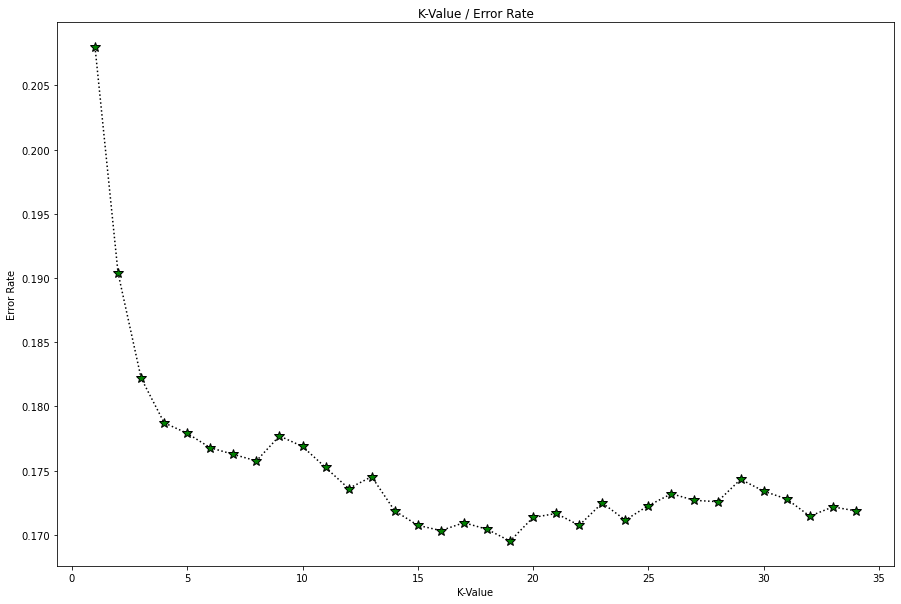

In [54]:
plt.figure(figsize=(15,10))
plt.plot(range(1,35),error_rate,color='black',linestyle='dotted',marker='*',markerfacecolor='green',markersize=10)
plt.title('K-Value / Error Rate')
plt.xlabel('K-Value')
plt.ylabel('Error Rate')

In [33]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y,B)
print("MAE: ",mae)

MAE:  10.031079172041029


In [34]:
import math
MSE = np.square(np.subtract(y,B)).mean() 
RMSE = math.sqrt(MSE)
print("RMSE: ",RMSE)

RMSE:  14.959035437892078


In [38]:
mape =np.mean(np.abs((y - B) / y)) * 100
print("MAPE: ",mape)


MAPE:  37.84546159292027


AttributeError: 'KNeighborsRegressor' object has no attribute 'feature_importances_'